# AdaBoost Ensemble Algorithm

#### TL;DR
Develop an understanding of the AdaBoost model and it's approach

### Reference Resources



### General Idea/Key Points

- Boosting: "Weak Learner" which takes multiple bags and assigns a higher weight to misclassified data in order for "learn". Also means you want "high bias" overfit models

$$F(x)=\sum_{m=1}^M\alpha_{m}f_{m}(x)$$

- We want weak "high bias" (under-fit) models as opposed to bagging/RF which dealt with overfit models (low bias, high variance)

- Not prone to overfitting

- Fast and efficient at training

- Typically used in conjunction with classifiers especially decision tree/random forest

- Also can be used with other classifiers and regressors

- AdaBoost (Additive Modeling): adds one trained (all data) base model at a time and resamples by assigning weights $w_{i}$ to misclassified data, calculate error weighted by $w_{i}$, calculate $\alpha_{m}$ (as function of error which means that higher $w_{m}$ should be bigger for more accurate/less error), iterate...

- AdaBoost uses a **Exponential Loss Function**

$$L(y,f(x))=exp(-yf(x))$$
or
$$J=\sum_{t=1}^Ne^{-y_{t}F(x_{t}}$$

$$(\alpha_{m}^*,f_{m}^*)=argmin_{\alpha_{m},f_{m}}\sum_{i=1}^N exp(-y_{i}\big[F_{m-1}(x_{i})+\alpha_{m}f_{m}(x_{i})\big])$$

which leads to a simplification

$$J=e^{-\alpha}A + e^{\alpha}B$$

where $A=\text{sum of corrects}$ and $B=\text{sum of incorrects}$

Now we can differentiate w.r.t to $\alpha$

$$\frac{\partial J}{\partial \alpha}=e^{-\alpha}A + e^{\alpha}B$$

and set to 0 

$$\alpha_{m}=\frac{1}{2}ln(\frac{A}{B})=\frac{1}{2}ln\big(\frac{\text{# weighted correct}}{\text{# weighted incorrect}}\big)=0$$

### AdaBoost Details

- use targets {-1, +1} and not {0, 1} 

- No resampling and all data is trained on base model

- Can we used for both regression and classification (trees as recommended base model)

- **KEY**: Use $w_{i}$ to weight how important each sample record is where an error will result in $w_{i}$ increasing

- decision boundary is 0.

- Bigger $\alpha$ means more accurate/less error

$$F(x)=sign\bigg(\sum_{m=1}^M \alpha_{m}f_{m}(x)\bigg)$$

where $sign$ is the targets {-1, +1}


### Math of AdaBoost

First initialize $w_{i}$'s

$$\epsilon_{m}=\frac{\sum_{i=1}^Nw_{i}I(y\neq f_{m}(X_{i}))}{\sum_{i=1}^N w_{i}}$$

$$\alpha_{m}=\frac{1}{2}log\big[\frac{1-\epsilon_{m}}{\epsilon_{m}}\big]$$

$$w_{i}=w_{i}exp\big[-\alpha_{m}y_{m}f_{m}(x_{i})\big],i=1,...,N$$

$$w_{i}=w_{i}/\sum_{j=1}^N w_{j}$$

the last step is a normalizes $w$ 

then save $\alpha_{m}$, $f_{m}(x)$ 

### Psuedocode

1. Initialize $w_{i}$ with equal weights for $i=1,...,N$
2. Fit $f_{m}(x)$ with sample weights $w_{i}$ for $m=1,...,M$
3. Error for each model: $\epsilon_{m}=\frac{\sum_{i=1}^N w_{i}I(y_{i}\neq f_{m}(x_{i}))}{\sum_{i=1}^N w_{i}}$
4. Alpha for each model: $\alpha_{m}=\frac{1}{2}log\big[\frac{1-\epsilon_{m}}{\epsilon_{m}}\big]$
5. Update the weights for each record: $w_{i}=w_{i}exp\big[-\alpha_{m}y_{i}f_{m}(x_{i})\big], \ i=1,...,N$
6. Normalize weights: $w_{i}=\frac{w_{i}}{\sum_{j=1}^N w_{j}}$

7. Stop and save $\alpha_{m},\ f_{m}(x)$

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [82]:
class AdaBoost:
    
    def __init__(self, M):
        self.M = M
        
    def fit(self, X, Y):
        self.models = []
        self.alphas = []
        
        N, _ = X.shape
        W = np.ones(N) / N
        
        for m in range(self.M):
            tree = DecisionTreeClassifier(max_depth=1)
            tree.fit(X, Y, sample_weight=W)
            P = tree.predict(X)
            
            err = W.dot(P != Y)
            alpha = 0.5*(np.log(1-err) -  np.log(err))
            
            W = W*np.exp(-alpha*Y*P) # vectorized form
            W = W/W.sum() # normalize 
            
            self.models.append(tree)
            self.alphas.append(alpha)
            
    def predict(self, X):
        N, _ = X.shape
        FX = np.zeros(N)
        for alpha, tree in zip(self.alphas, self.models):
            FX += alpha*tree.predict(X)
        return np.sign(FX), FX
    
    def score(self, X, Y):
        P, FX = self.predict(X)
        L = np.exp(-Y*FX).mean()
        return np.mean(P==Y), L

In [84]:
class AdaBoost:
  def __init__(self, M):
    self.M = M

  def fit(self, X, Y):
    self.models = []
    self.alphas = []

    N, _ = X.shape
    W = np.ones(N) / N

    for m in range(self.M):
      tree = DecisionTreeClassifier(max_depth=1)
      tree.fit(X, Y, sample_weight=W)
      P = tree.predict(X)

      err = W.dot(P != Y)
      alpha = 0.5*(np.log(1 - err) - np.log(err))

      W = W*np.exp(-alpha*Y*P) # vectorized form
      W = W / W.sum() # normalize so it sums to 1

      self.models.append(tree)
      self.alphas.append(alpha)

  def predict(self, X):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    N, _ = X.shape
    FX = np.zeros(N)
    for alpha, tree in zip(self.alphas, self.models):
      FX += alpha*tree.predict(X)
    return np.sign(FX), FX

  def score(self, X, Y):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    P, FX = self.predict(X)
    L = np.exp(-Y*FX).mean()
    return np.mean(P == Y), L

/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


20
40
60
80
100
120
140
160
180
final train error: 0.0
final test error: 0.016000000000000014


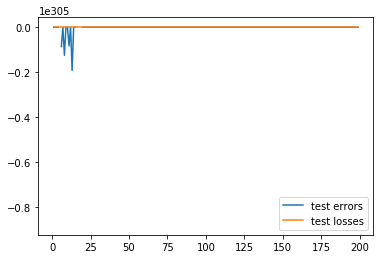

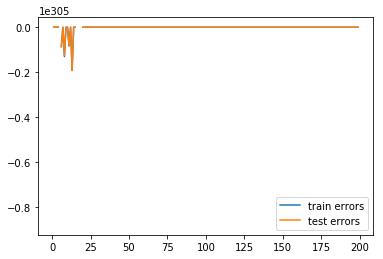

In [85]:
if __name__ == '__main__':
    mushroom_df = pd.read_csv('./data/mushrooms.csv')
    data_encoded = preprocessing.LabelEncoder() #So, lets code them into numeric categories. Used scikit 
    for column in mushroom_df.columns[1:]: #OneHotEncoder. Another way - pandas.get_dummies. Code 
        mushroom_df[column] = data_encoded.fit(mushroom_df[column]).transform(mushroom_df[column])
        
    X = mushroom_df.iloc[:, 1:].values
    Y = mushroom_df.iloc[:, 0]
    Y[Y=='p'] = -1
    Y[Y=='e'] = 1
    Y = Y.astype(int)
    Y = Y.values
    
    Ntrain = int(0.8*len(X))
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    T = 200
    train_errors = np.empty(T)
    test_losses = np.empty(T)
    test_errors = np.empty(T)
    for num_trees in range(T):
        if num_trees == 0:
          train_errors[num_trees] = None
          test_errors[num_trees] = None
          test_losses[num_trees] = None
          continue
        if num_trees % 20 == 0:
          print(num_trees)
        
    model = AdaBoost(num_trees)
    model.fit(Xtrain, Ytrain)
    acc, loss = model.score(Xtest, Ytest)
    acc_train, _ = model.score(Xtrain, Ytrain)
    train_errors[num_trees] = 1 - acc_train
    test_errors[num_trees] = 1 - acc
    test_losses[num_trees] = loss
    
    if num_trees == T - 1:
      print("final train error:", 1 - acc_train)
      print("final test error:", 1 - acc)

    plt.plot(test_errors, label='test errors')
    plt.plot(test_losses, label='test losses')
    plt.legend()
    plt.show()

    plt.plot(train_errors, label='train errors')
    plt.plot(test_errors, label='test errors')
    plt.legend()
    plt.show()

In [69]:
mushroom_df = pd.read_csv('./data/mushrooms.csv')
data_encoded = preprocessing.LabelEncoder() #So, lets code them into numeric categories. Used scikit 
for column in mushroom_df.columns[1:]: #OneHotEncoder. Another way - pandas.get_dummies. Code 
    mushroom_df[column] = data_encoded.fit(mushroom_df[column]).transform(mushroom_df[column])

X = mushroom_df.iloc[:, 1:].values
Y = mushroom_df.iloc[:, 0]
Y[Y=='p'] = -1
Y[Y=='e'] = 1
Y = Y.astype(int)
Y = Y.values

/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Stacking v AdaBoost

In terms of cost functions

- Both use weighted ensemble of base models

- AdaBoost: base classifier is $f_{m}$ trained with sample weights $W^{m}$
- Stacking: base classifier is trained with a leave-one-out (-i means don't train on sample i)

#### Complexity

- AdaBoost has linear O(N)
- Stacking has quadratic O(NM)

## AdaBoost Connection to Deep Learning

Basically the same structure as a 1-hidden neural network except...

AdaBoost uses a hard output a value either -1 or 1: $sign={-1, 1}$
NeuralNet uses a soft output a value between -1 and 1: $tanh=[-1, 1]$

AdaBoost: $\hat{y}=sign\big( \sum_{m=1}^M \alpha_{m}(sign(w_{m}^T x)\big)$

NeuralNet: $\hat{y}=sign\big( \sum_{m=1}^M \alpha_{m}(tanh(w_{m}^T x)\big)$

AdaBoost updates weights sequentially while NeuralNet updates weights globally 